## Logistic Regression
## Linear SVC (Support Vector Classification)

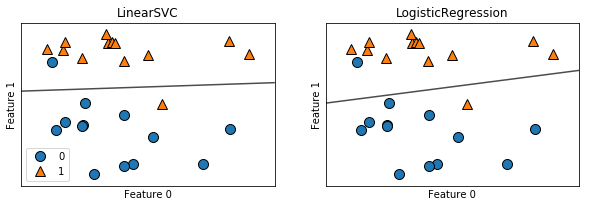

In [19]:
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
figs, axes = plt.subplots(1, 2, figsize= (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

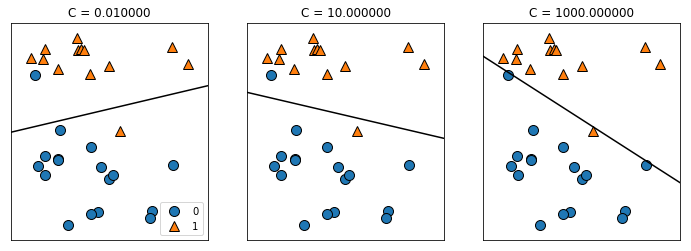

In [20]:
mglearn.plots.plot_linear_svc_regularization()

### Analyzing LinearRegression 
### Regularization parameter C's default value 1 provides 95% accuracy both on training and test set. but as training and test performance are very close, it nearly underfitting 

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

logreg = LogisticRegression().fit(X_train, y_train)

print("Train set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Train set score: 0.955
Test set score: 0.958


In [10]:
# lets increase C to fit a more flexible model

logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)

print("Train set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


Train set score: 0.972
Test set score: 0.965


In [12]:
# lets decrease C 

logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)

print("Train set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Train set score: 0.934
Test set score: 0.930


## Linear models for multiclass classification (one vs rest approach)

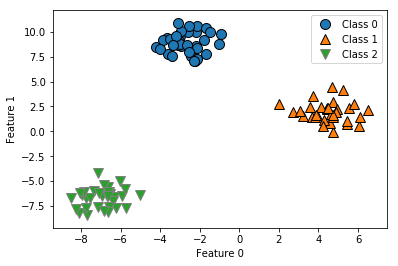

In [17]:
%matplotlib inline

from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.legend as legend

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [24]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient Shape: ", linear_svm.coef_.shape) # same
print("Intercept Shape: {}".format(linear_svm.intercept_.shape)) # same

Coefficient Shape:  (1, 2)
Intercept Shape: (1,)


### Let's visualize the lines given by the three class binary classifiers

ValueError: not enough values to unpack (expected 3, got 1)

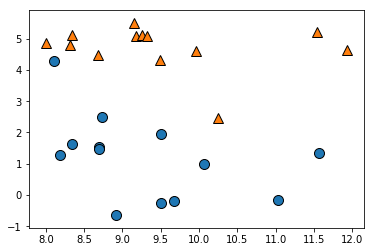

In [27]:
import numpy as np

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_), ['b', 'r', 'g']:
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc = (1.01, 0.3))

### Predictions for all regions of the 2D space

ValueError: not enough values to unpack (expected 3, got 1)

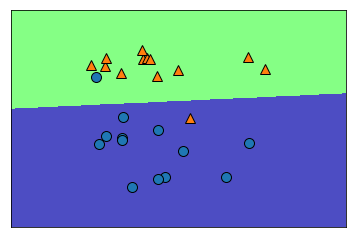

In [28]:
import numpy as np

mglearn.plots.plot_2d_classification(linear_svm, X, fill =True, alpha = 0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_), ['b', 'r', 'g']:
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc = (1.01, 0.3))

## above two plots got wrong because of shape 
### expected (3, 2) / (3, )
